In [214]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

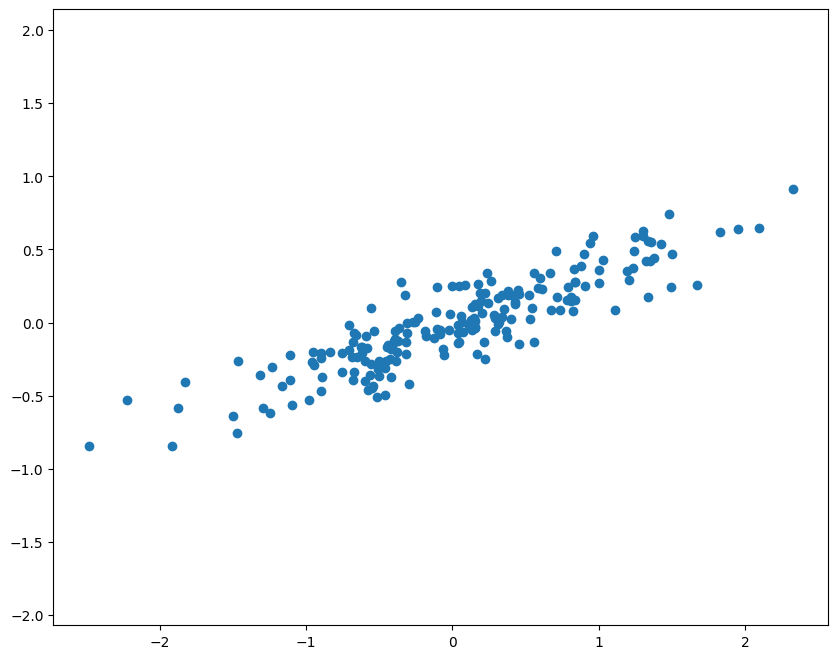

In [215]:
# ig it is already in the center
X = np.genfromtxt('PCA.csv',delimiter=',')
plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')
plt.show()

In [216]:
print(X.shape)

(200, 2)


In [217]:
# TODO: Fit a PCA with 2 principal components
pca = PCA(n_components=2)
pca.fit(X)
print(f"pca mean: {pca.mean_}")
# the eigenvectors are the components
print(f"Components:\n{pca.components_}")

# the eigenvalue is the variance explained by the component
print(f"Explained variance:\n{pca.explained_variance_}")

pca mean: [ 0.03351168 -0.00408072]
Components:
[[ 0.94446029  0.32862557]
 [-0.32862557  0.94446029]]
Explained variance:
[0.7625315 0.0184779]


Visualize the principal components obtained by using PCA.

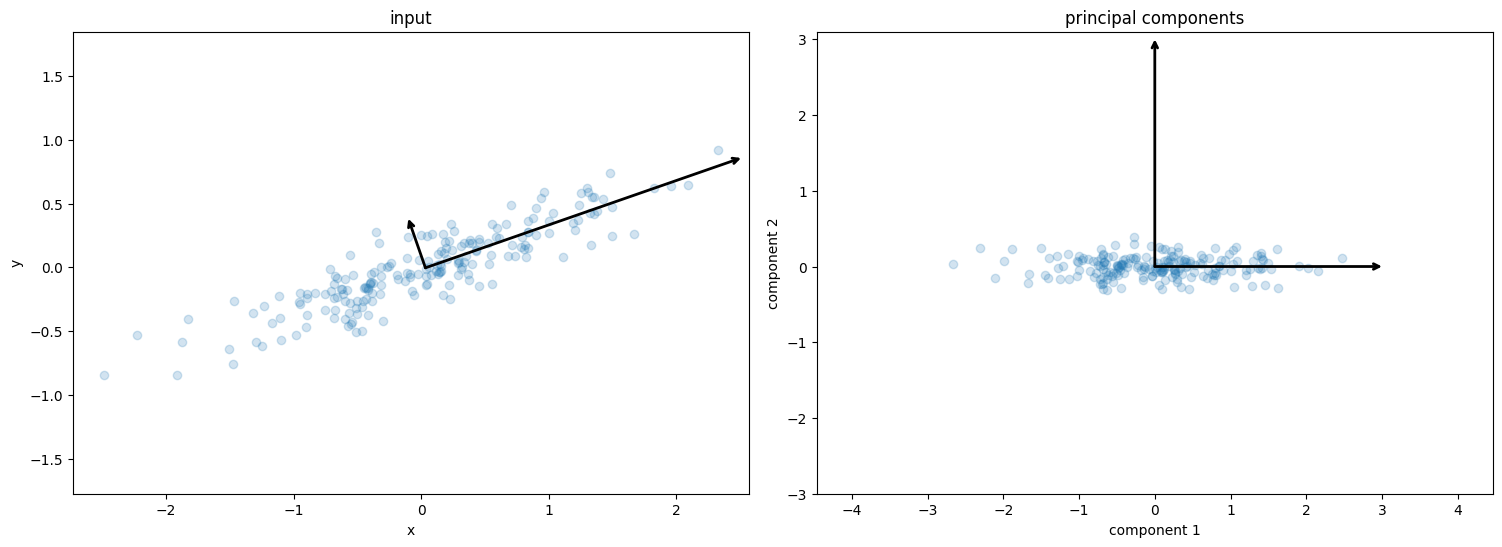

In [218]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca() # gets the current axes
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops) 

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# plot data
ax[0].scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length) # standerd deviation ig
    draw_vector(pca.mean_, pca.mean_ + v, ax=ax[0])
ax[0].axis('equal')
ax[0].set(xlabel='x', ylabel='y', title='input')

# plot principal components
X_pca = pca.transform(X) # since we keep 2 components, the shape will be mostly rotated and scaled
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
draw_vector([0, 0], [0, 3], ax=ax[1])
draw_vector([0, 0], [3, 0], ax=ax[1])
ax[1].axis('equal')
ax[1].set(xlabel='component 1', ylabel='component 2',
          title='principal components',
          xlim=(-5, 5), ylim=(-3, 3.1))
plt.show()

Fit a PCA with only one component and visualise the projection to the one-dimensional space.

In [219]:
# TODO: Fit PCA with 1 component
pca = PCA(n_components=1)

# TODO: Transform X using PCA (Hint: use pca.transform() on X)
X_pca = pca.fit_transform(X)

print(f"Original shape: {X.shape}")
print(f"Transformed shape: {X_pca.shape}")

Original shape: (200, 2)
Transformed shape: (200, 1)


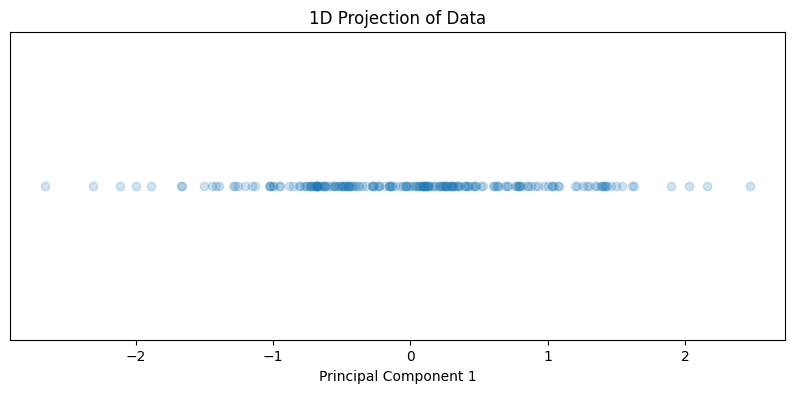

In [220]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

ax.scatter(X_pca, np.zeros_like(X_pca), alpha=0.2)
ax.set(xlabel='Principal Component 1', ylabel='', title='1D Projection of Data')
ax.yaxis.set_visible(False) 

plt.show()

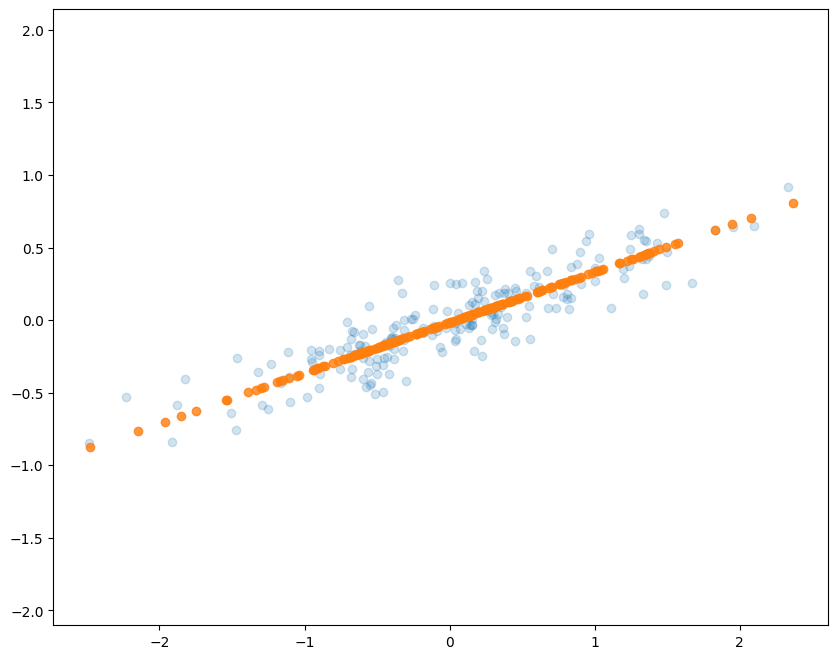

In [221]:
# TODO: Apply the inverse transform on X_pca (Hint: use pca.inverse_transform())
X_new = pca.inverse_transform(X_pca)

plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal')
plt.show()

Load the iris dataset.

In [222]:
df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
    header=None, 
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True) # drops the empty line at file-end
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

Generate histograms of each feature colored by the class lable.

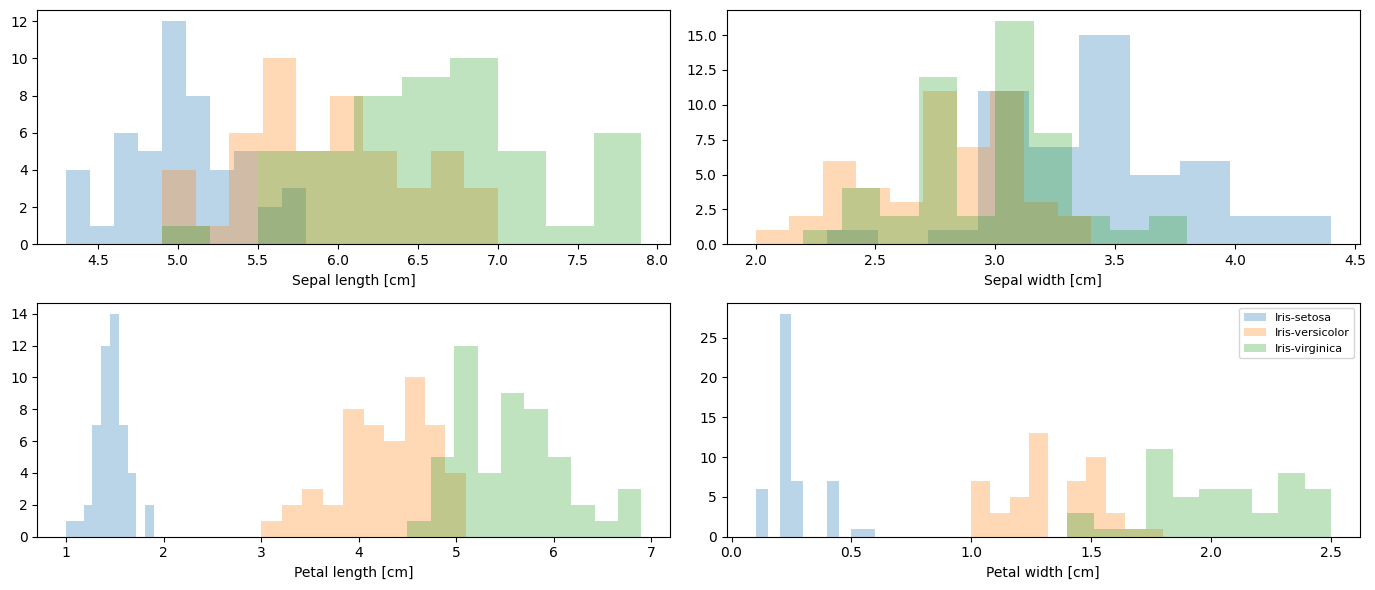

In [223]:
def plot_histograms(X, y):
  label_dict = {1: 'Iris-Setosa',
                2: 'Iris-Versicolor',
                3: 'Iris-Virgnica'}

  feature_dict = {0: 'Sepal length [cm]',
                  1: 'Sepal width [cm]',
                  2: 'Petal length [cm]',
                  3: 'Petal width [cm]'}

  plt.figure(figsize=(14, 6))
  for cnt in range(4):
      plt.subplot(2, 2, cnt+1)
      for lab in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
          plt.hist(X[y==lab, cnt],
                   label=lab,
                   bins=10,
                   alpha=0.3,)
      plt.xlabel(feature_dict[cnt])
  plt.legend(loc='upper right', fancybox=True, fontsize=8)

  plt.tight_layout()
  plt.show()

plot_histograms(X, y)

Do the same as above but standardize the data first.

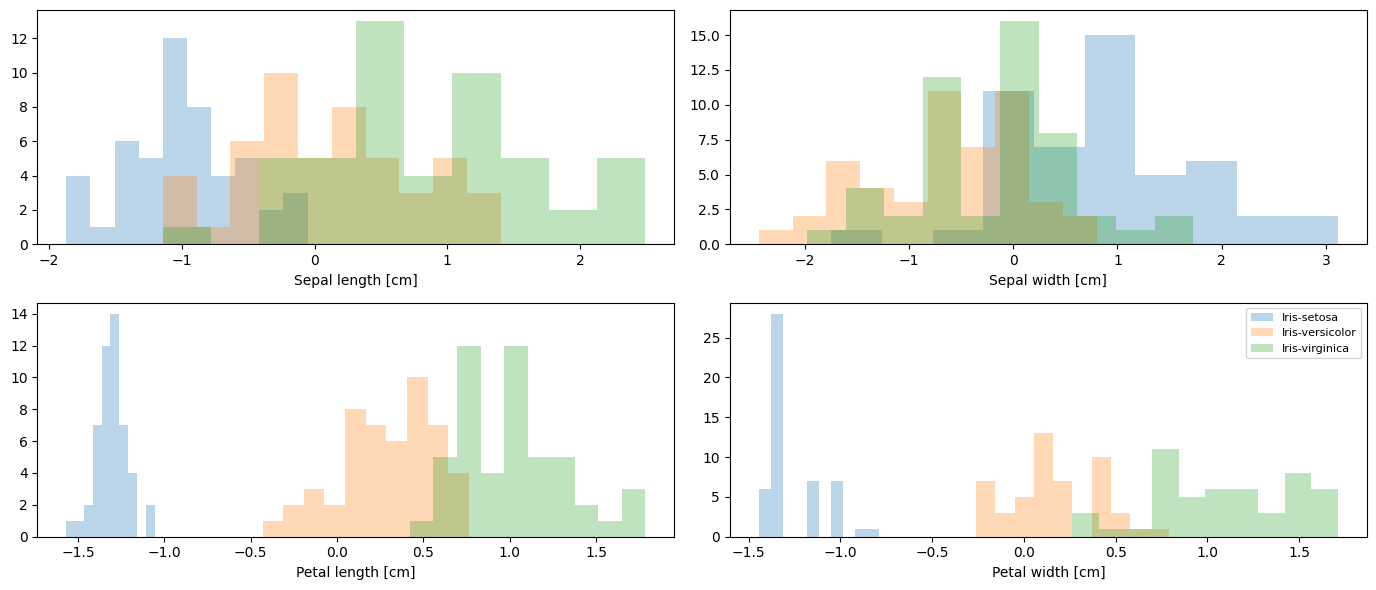

In [224]:
# TODO: Standardize the features using StandardScaler (Hint: use StandardScaler's fit_transform() method) and plot historgrams as done above.
X_std = StandardScaler().fit_transform(X)
plot_histograms(X_std, y)

all of the data is now normalized around 0, so the data looks the same, but is just shifted and squashed.

Compute covariance matrix and eigenvectors of it using NumPy:

In [225]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print(f"Covariance matrix: \n{cov_mat}")

Covariance matrix: 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [226]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print(f"Eigenvectors \n{eig_vecs}")
print(f"\nEigenvalues \n{eig_vals}")

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.93035378 0.92740362 0.14834223 0.02074601]


In [227]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(f"Eigenvalue: {i[0]:.4f}, Eigenvector: {i[1]}")

Eigenvalues in descending order:
Eigenvalue: 2.9304, Eigenvector: [ 0.52237162 -0.26335492  0.58125401  0.56561105]
Eigenvalue: 0.9274, Eigenvector: [-0.37231836 -0.92555649 -0.02109478 -0.06541577]
Eigenvalue: 0.1483, Eigenvector: [-0.72101681  0.24203288  0.14089226  0.6338014 ]
Eigenvalue: 0.0207, Eigenvector: [ 0.26199559 -0.12413481 -0.80115427  0.52354627]


Plot the explained variance for each of the found principal components.

4.026845637583896
[72.77045209380135, 23.030523267680646, 3.683831957627379, 0.5151926808906375]
[ 72.77045209  95.80097536  99.48480732 100.        ]


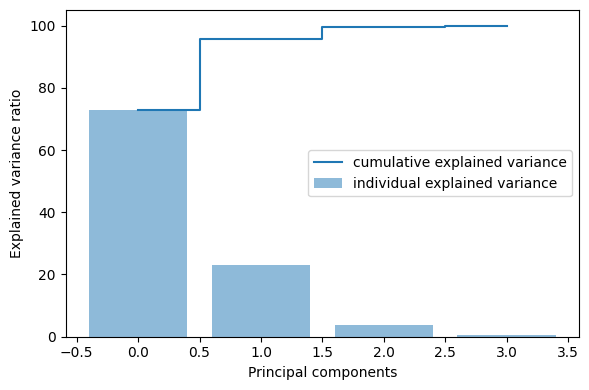

In [228]:
tot = sum(eig_vals)
print(tot)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
print(var_exp)
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)

#basically what we are doing when asking the pca to keep 90% of the variance

plt.figure(figsize=(6, 4))

plt.bar(range(4), var_exp, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(4), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Let us construct the projection matrix $W$.

In [229]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1), 
                      eig_pairs[1][1].reshape(4,1)))
print(f"Matrix W:\n {matrix_w}")
# sklearn also flips the sign of the eigenvectors based on the sign of the largest element

# flip based on the largest element, simplified version of what sklearn does
for i in range(matrix_w.shape[1]):
    largest = np.argmax(np.abs(matrix_w[:, i]))
    matrix_w[:, i] = np.sign(matrix_w[largest, i]) * matrix_w[:, i]
print(f"Matrix W after :\n {matrix_w}")

Matrix W:
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]
Matrix W after :
 [[ 0.52237162  0.37231836]
 [-0.26335492  0.92555649]
 [ 0.58125401  0.02109478]
 [ 0.56561105  0.06541577]]


We are ready to project the data onto our 2-dimensional space. We do this by computing the matrix product $XW$.

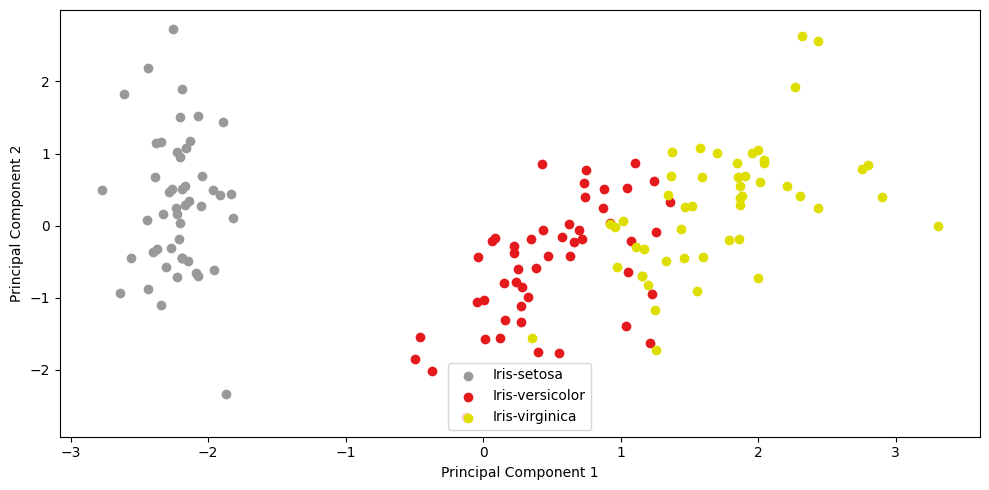

In [230]:
Y = X_std.dot(matrix_w)

plt.figure(figsize=(10, 5))
for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'), 
                    ('#999999', '#e41a1c', '#dede00')):
    plt.scatter(Y[y==lab, 0],
                Y[y==lab, 1],
                label=lab,
                c=col)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='lower center')
plt.tight_layout()
plt.show()

Compare it to sklearn's implementation:

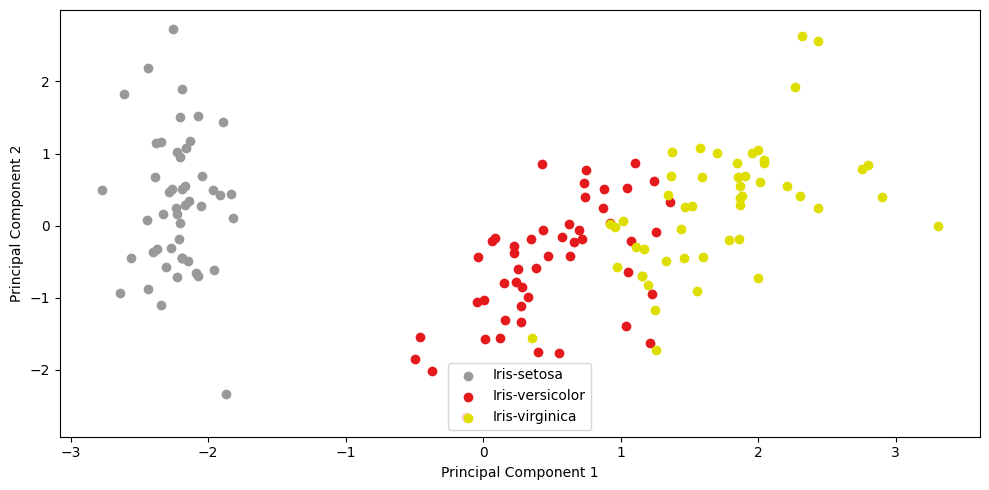

In [ ]:
pca = PCA(n_components=2)
Y = pca.fit_transform(X_std)

plt.figure(figsize=(10, 5))
for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'), 
                    ('#999999', '#e41a1c', '#dede00')):
    plt.scatter(Y[y==lab, 0],
                Y[y==lab, 1],
                label=lab,
                c=col)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='lower center')
plt.tight_layout()
plt.show()

# Autoencoders for dimensionality reduction

In [232]:
import time
import tensorflow
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import models, layers
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Load the fasion MNIST dataset, flatten the image to a 1-dimensional array and scale it to 0-1.

In [ ]:
(data, labels), (_, _) = fashion_mnist.load_data()
data = data.reshape(-1, 28*28) / 255.

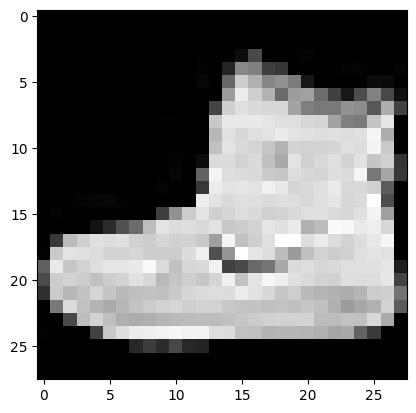

In [244]:
plt.imshow(data[0].reshape(28, 28), cmap='gray')

Define a simple autoencoder model using dense layers. We use the Adam optimizer with MSE loss as our objective function.

In [250]:
def dim_red_ae(data,n_dims_encoded=2):
    input_layer = layers.Input(shape=(28*28,))
    encoding_layer = layers.Dense(n_dims_encoded,activation='tanh')(input_layer)
    decoding_layer = layers.Dense(28*28,activation='tanh') (encoding_layer)
    autoencoder = models.Model(input_layer, decoding_layer)
    autoencoder.compile('adam', loss='mse')
    autoencoder.fit(x = data, y = data, epochs=5)
    encoder = models.Model(input_layer, encoding_layer)
    return encoder,autoencoder

Train the autoencoder and project to latent space using the encoder part of our trained model.

In [251]:
encoder, autoencoder = dim_red_ae(data,n_dims_encoded=2)
encodings = encoder.predict(data)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0877
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0476
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0465
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0463
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0463
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


Visualize the embedded images using a scatter plot.

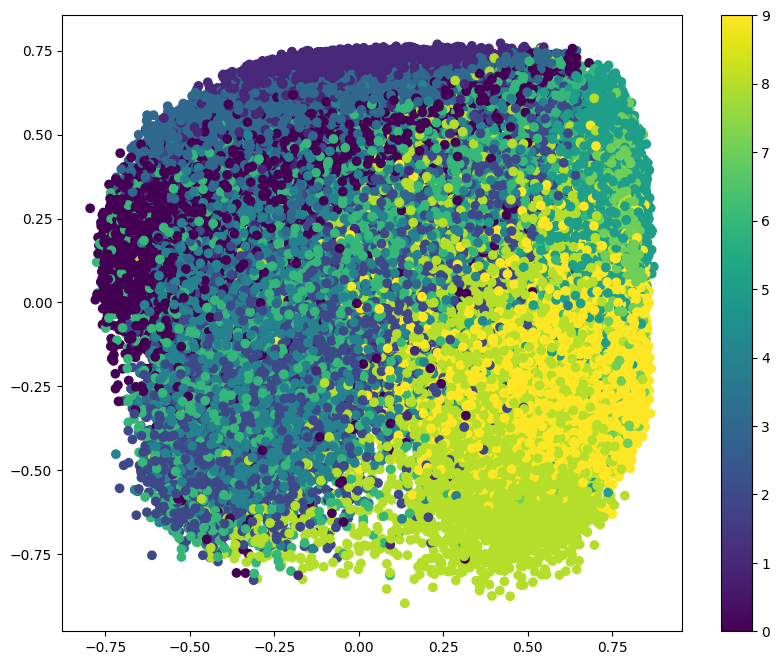

In [252]:
plt.figure(figsize=(10,8))
plt.scatter(encodings[:, 0], encodings[:, 1], c=labels)
plt.colorbar()
plt.show()

Let us inspect how well the autoencoder is able to reconstruct an input image using only two dimensions in the latent space.

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


<Figure size 1000x1000 with 0 Axes>

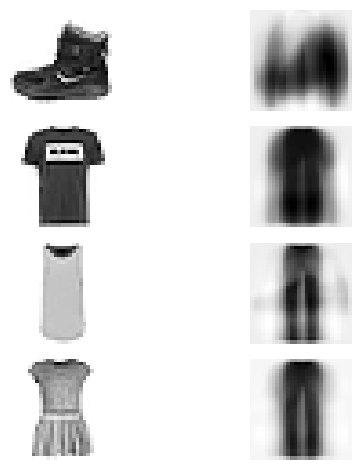

In [253]:
img = autoencoder.predict(data)
plt.figure(figsize=(10, 10))
fig,ax = plt.subplots(4,2)
for i in range(4):
    reconstruction = img[i].reshape(28,28)
    ax[i,0].imshow(data[i].reshape(28,28),cmap="Greys")
    ax[i,1].imshow(reconstruction, cmap="Greys")
    ax[i,0].axis("off")
    ax[i,1].axis("off")
fig.tight_layout()
plt.show()

Try again, but now with a $100$-dimensional latent space.

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0313
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.0114
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0104
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0101
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


<Figure size 1000x1000 with 0 Axes>

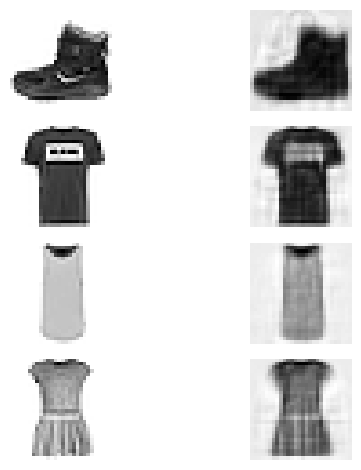

In [255]:
# TODO: Train a autoencoder with n_dims_encoded=100
encoder,autoencoder = dim_red_ae(data,100)

# TODO: Run the data through the autoencoder to get the reconstructed images
img = autoencoder.predict(data)

# Plot the results
plt.figure(figsize=(10, 10))
fig,ax = plt.subplots(4,2)
for i in range(4):
    reconstruction = img[i].reshape(28,28)
    ax[i,0].imshow(data[i].reshape(28,28),cmap="Greys")
    ax[i,1].imshow(reconstruction, cmap="Greys")
    ax[i,0].axis("off")
    ax[i,1].axis("off")
fig.tight_layout()
plt.show()

Let us split the first 10000 images into training and validation.

In [257]:
X_train,X_val,y_train,y_val = train_test_split(
    data[:10000],
    labels[:10000],
    train_size=0.7,
)

Train a decision tree classifier on the image data directly.

In [ ]:
start = time.time()
model1 = DecisionTreeClassifier()
model1.fit(X_train, y_train)
end = time.time()

acc = accuracy_score(y_val, model1.predict(X_val))

print(f"Fitting the decision tree took {end - start:.4f} seconds.")
print(f"Accuracy: {acc:.4f}")

Fitting the decision tree took 3.3475 seconds.
Accuracy: 0.7337


Train a KNN classifier on the latent space embeddings and try different dimensions for the latent space as a hyperparameter.

In [260]:
acc_list = []
time_list = []
possible_dims = [2,5,10,20,40]
for dims in possible_dims:
    # Train and embed using autoencoder
    print(f"\nTraining with {dims} dimensions")
    
    # TODO: Train autoencoder with dims hidden dimensions
    encoder,autoencoder = dim_red_ae(data,dims)

    # TODO: Compute encodings of the training dataset
    encodings = encoder.predict(X_train)

    # Fit and predict using KNN
    start = time.time()
    
    # TODO: Fit a decision tree classifier on the training data
    clf = DecisionTreeClassifier()
    clf.fit(encodings, y_train)

    end = time.time()
    
    # TODO: Compute the validation accuracy of the decision tree classifier. 
    # Remember to embed the validation data using the encoder before passing it to the decision tree.
    encodings = encoder.predict(X_val)
    predictions = clf.predict(encodings)
    accuracy = accuracy_score(y_val, predictions)
    
    time_used = end - start
    time_list.append(time_used)
    acc_list.append(accuracy)


Training with 2 dimensions
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0869
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0476
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0468
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0465
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0462
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Training with 5 dimensions
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0705
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0358
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0344
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0341
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0336
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Training with 10 dimensions
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0570
Epoch 2

Plotting the accuracy and time used to fit the decision tree classifier.

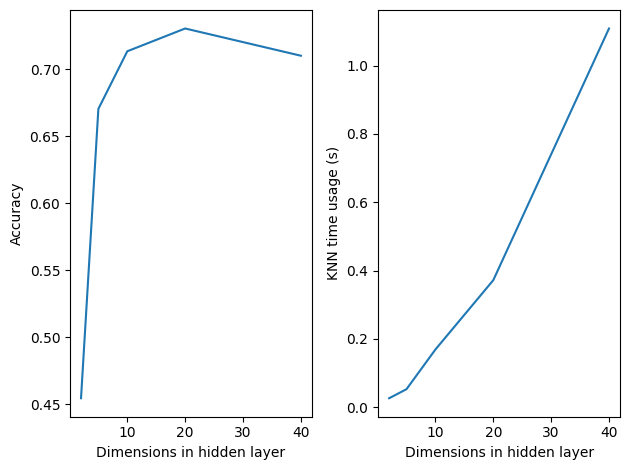

In [261]:
fig, ax = plt.subplots(ncols=2)
ax[0].plot(possible_dims, acc_list)
ax[1].plot(possible_dims, time_list)
ax[0].set_xlabel("Dimensions in hidden layer")
ax[1].set_xlabel("Dimensions in hidden layer")
ax[0].set_ylabel("Accuracy")
ax[1].set_ylabel("KNN time usage (s)")
fig.tight_layout()
plt.show()